In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
axenic = pd.read_excel('raw_data/cell_density_wt_axenic.xlsx', engine='openpyxl',
                       sheet_name='axenic')
ox_stress_wt = pd.read_excel('raw_data/cell_density_wt_axenic.xlsx', engine='openpyxl',
                       sheet_name='ox_stress_wt')
ox_stress_key = pd.read_excel('raw_data/cell_density_wt_axenic.xlsx', engine='openpyxl',
                       sheet_name='ox_stress_key')

In [29]:
crit = (ox_stress_wt['DO2 % of Air Saturation'] == 0)
ox_stress_wt_base = ox_stress_wt.loc[crit]['Average Growth Rate, hr-1']

In [17]:
growth_rate_ox_stress = ox_stress_wt['Average Growth Rate, hr-1']

In [30]:
ox_stress_key

,Long Name,Short meaningful name,Sampling date,"BC Time, hr",DOT % of Air Sat.,Air or O2 L/min,N2 L/min,CO2 L/min,Light,Oxygen. %,"Supplied dO2 of air saturation, %"
0,ELO081723.1,WT100.0A,2023-08-29 17:05:00,293.31,3.624,0.0,2.0,0.04,50:50,0.000000,0.000000
1,ELO081723.1,WT100.0B,2023-08-29 17:05:00,293.31,3.624,0.0,2.0,0.04,50:50,0.000000,0.000000
2,ELO081723.2,WT205.0A,2023-09-02 15:55:00,388.20,4.600,0.0,2.0,0.04,140:65,0.000000,0.000000
3,ELO081723.2,WT205.0B,2023-09-02 15:55:00,388.20,4.600,0.0,2.0,0.04,140:65,0.000000,0.000000
4,ELO081723.3,WT205.5A,2023-09-05 15:15:00,459.46,30.118,0.5,1.5,0.04,140:65,0.049020,23.401732
5,ELO081723.3,WT205.5B,2023-09-05 15:15:00,459.46,30.118,0.5,1.5,0.04,140:65,0.049020,23.401732
6,ELO081723.4,WT205.10A,2023-09-08 14:20:00,530.55,54.180,0.2,1.8,0.04,140:65,0.098039,46.803464
7,ELO081723.4,WT205.10B,2023-09-08 14:20:00,530.55,54.180,0.2,1.8,0.04,140:65,0.098039,46.803464
8,ELO081723.5,WT205.20A,2023-09-15 15:20:00,699.56,94.420,0.4,1.6,0.04,140:65,0.196078,93.606928
9,ELO081723.5,WT205.20B,2023-09-15 15:20:00,699.56,94.420,0.4,1.6,0.04,140:65,0.196078,93.606928


In [14]:
axenic.head()

,S.e mixed axenic,Hour of cultivation,change in cells/ml,change in hours from last timepoint,d (cells/ml) / d(hours)
0,0.047900,0.0,0.005767,34.0,0.000170
1,0.053667,34.0,0.624367,24.0,0.026015
2,0.678033,58.0,0.366533,20.0,0.018327
3,1.044567,78.0,0.082867,23.0,0.003603
4,1.127433,101.0,0.034000,29.5,0.001153


In [ ]:
growth_rate = axenic['d (cells/ml) / d(hours)']
growth_rate.plot(kind='hist')
growth_rate_ox_stress.plot(kind='hist')

In [32]:
ox_stress_wt_base[0]

0.1148484047894031

Text(0.1148484047894031, 2, 'WT')

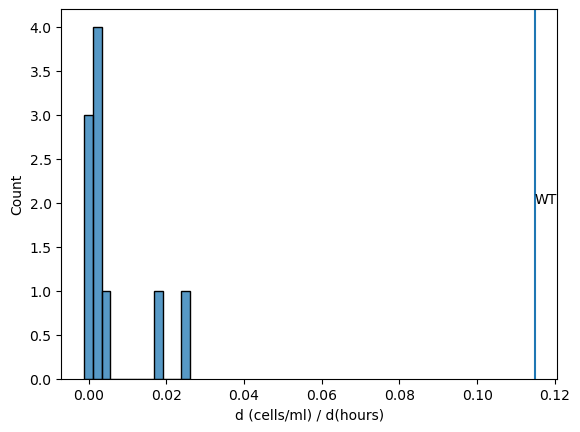

In [35]:
sns.histplot(x=growth_rate)
# sns.histplot(x=growth_rate_ox_stress)
# sns.histplot(x=ox_stress_wt_base)
plt.axvline(ox_stress_wt_base[0])
plt.text(x=ox_stress_wt_base[0], y=2, s='WT')